# 1. O Desafio da Manutenção Preditiva

### 1.1. O Problema de Negócio para a Wilson Sons
Em um setor de alta competitividade como o de logística marítima, um dos maiores desafios para uma empresa líder como a Wilson Sons é a gestão da manutenção de sua frota. A manutenção não planejada de um ativo crítico, como um rebocador, gera não apenas custos elevados com reparos emergenciais, mas também riscos operacionais que podem impactar a pontualidade, a receita e a reputação da companhia.

O modelo tradicional de manutenção preventiva, baseado em intervalos de tempo fixos, embora seja um padrão da indústria, possui uma ineficiência inerente: ele não consegue diferenciar o desgaste de um ativo que opera em condições severas daquele que opera em um cenário mais leve. Isso abre a porta para uma otimização estratégica: a **manutenção preditiva**, baseada nos dados reais de operação de cada equipamento.

### 1.2. Objetivo da Prova de Conceito (PoC)
Esta Prova de Conceito (PoC) tem como objetivo **demonstrar a metodologia e a viabilidade técnica** de um modelo de Machine Learning para prever falhas em rebocadores. Utilizando um dataset sintético, simularemos este desafio de negócio para mostrar, na prática, como a análise de dados pode transformar a manutenção de um centro de custo reativo em uma **vantagem competitiva e estratégica.**

# Sumário - PoC Manutenção Preditiva

*   [1. O Desafio da Manutenção Preditiva](#1.-O-Desafio-da-Manutenção-Preditiva)
    *   [1.1. O Problema de Negócio para a Wilson Sons](#1.1.-O-Problema-de-Negócio-para-a-Wilson-Sons)
    *   [1.2. Objetivo da Prova de Conceito (PoC)](#1.2.-Objetivo-da-Prova-de-Conceito-(PoC))
*   [2. Preparação e Entendimento dos Dados](#2.-Preparação-e-Entendimento-dos-Dados)
    *   [2.1. Importação das Bibliotecas](#2.1.-Importação-das-Bibliotecas)
    *   [2.2. Carregamento das Fontes de Dados (CSVs)](#2.2.-Carregamento-das-Fontes-de-Dados-(CSVs))
    *   [2.3. Limpeza e Tratamento Inicial (Conversão de Tipos)](#2.3.-Limpeza-e-Tratamento-Inicial-(Conversão-de-Tipos))
*   [3. Engenharia de Atributos (Feature Engineering)](#3.-Engenharia-de-Atributos-(Feature-Engineering))
    *   [3.1. Junção das Bases de Dados para Contexto Operacional](#3.1.-Junção-das-Bases-de-Dados-para-Contexto-Operacional)
    *   [3.2. Criação das Variáveis Preditivas (Features)](#3.2.-Criação-das-Variáveis-Preditivas-(Features))
    *   [3.3. Definição da Variável-Alvo (`falha_proximos_7_dias`)](#3.3.-Definição-da-Variável-Alvo-(`falha_proximos_7_dias`))
*   [4. Análise Exploratória dos Dados (AED)](#4.-Análise-Exploratória-dos-Dados-(AED))
    *   [4.1. Matriz de Correlação: Identificando as Relações entre as Variáveis](#4.1.-Matriz-de-Correlação:-Identificando-as-Relações-entre-as-Variáveis)
*   [5. Construção do Modelo Preditivo](#5.-Construção-do-Modelo-Preditivo)
    *   [5.1. Divisão dos Dados em Conjuntos de Treino e Teste](#5.1.-Divisão-dos-Dados-em-Conjuntos-de-Treino-e-Teste)
    *   [5.2. Treinamento do Modelo: Árvore de Decisão](#5.2.-Treinamento-do-Modelo:-Árvore-de-Decisão)
    *   [5.3. Visualização da Árvore de Decisão e Suas Regras](#5.3.-Visualização-da-Árvore-de-Decisão-e-Suas-Regras)
*   [6. Avaliação de Performance do Modelo](#6.-Avaliação-de-Performance-do-Modelo)
    *   [6.1. Análise dos Resultados nos Dados de Teste](#6.1.-Análise-dos-Resultados-nos-Dados-de-Teste)
    *   [6.2. Relatório de Classificação e Matriz de Confusão](#6.2.-Relatório-de-Classificação-e-Matriz-de-Confusão)
*   [7. Conclusão e Próximos Passos](#7.-Conclusão-e-Próximos-Passos)
    *   [7.1. Validação do Conceito com Dados Fictícios](#7.1.-Validação-do-Conceito-com-Dados-Fictícios)
    *   [7.2. Roteiro para Implementação com Dados Reais](#7.2.-Roteiro-para-Implementação-com-Dados-Reais)

# 2. Preparação e Entendimento dos Dados

### 2.1. Importação das Bibliotecas
Nesta primeira etapa, carregamos todas as bibliotecas Python necessárias para a análise, incluindo `pandas` para manipulação de dados, `matplotlib` e `seaborn` para visualização, e `scikit-learn` para a construção e avaliação do modelo preditivo.

In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 2.2. Carregamento das Fontes de Dados (CSVs)
A análise se baseia em quatro fontes de dados sintéticos que simulam o ambiente operacional da Wilson Sons:
- **`rebocadores.csv`**: Cadastro da frota, com informações de cada embarcação.
- **`operacoes.csv`**: Telemetria das operações, com dados de sensores e localização.
- **`manutencoes.csv`**: Histórico de manutenções, tanto preventivas quanto corretivas (falhas).
- **`clima_diario.csv`**: Dados meteorológicos externos para cada porto de operação.

In [44]:
df_rebocadores = pd.read_csv('../dataset/rebocadores.csv')
df_manutencoes = pd.read_csv('../dataset/manutencoes.csv')
df_operacoes = pd.read_csv('../dataset/operacoes.csv')
df_clima = pd.read_csv('../dataset/clima_diario.csv')

### 2.3. Limpeza e Tratamento Inicial (Conversão de Tipos)
A etapa de limpeza é fundamental para garantir a qualidade e a consistência dos dados. Aqui, realizamos o tratamento inicial, que inclui:
- **Verificação dos tipos de dados**: Garantir que cada coluna esteja no formato correto.
- **Conversão de colunas de data**: Transformar as colunas de data/hora (que são carregadas como texto) para o formato `datetime`, permitindo análises temporais.
- **Verificação de duplicatas e nulos**: Assegurar a integridade da base de dados.

In [45]:
print(df_manutencoes.dtypes)
print(df_operacoes.dtypes)
print(df_clima.dtypes)

id_manutencao          int64
id_rebocador           int64
data_manutencao       object
tipo_manutencao       object
componente_afetado    object
custo_reparo_reais     int64
dias_inativo           int64
dtype: object
id_operacao             int64
id_rebocador            int64
timestamp              object
latitude              float64
longitude             float64
temp_motor_celsius    float64
nivel_vibracao_hz     float64
dtype: object
data                     object
porto                    object
condicao_tempo           object
temperatura_celsius     float64
umidade_percentual        int64
velocidade_vento_kmh    float64
dtype: object


In [46]:
# 1. Corrigir tipos de dados, especialmente datas
df_manutencoes['data_manutencao'] = pd.to_datetime(df_manutencoes['data_manutencao'])
df_operacoes['timestamp'] = pd.to_datetime(df_operacoes['timestamp'])
df_clima['data'] = pd.to_datetime(df_clima['data'])

# 2. Checar e remover linhas duplicadas, se existirem
for df in [df_rebocadores, df_manutencoes, df_operacoes, df_clima]:
    df.drop_duplicates(inplace=True)

# 3. Checar valores nulos (demonstrativo)
df_operacoes.isnull().sum()
df_clima.isnull().sum()

data                    0
porto                   0
condicao_tempo          0
temperatura_celsius     0
umidade_percentual      0
velocidade_vento_kmh    0
dtype: int64

# 3. Engenharia de Atributos (Feature Engineering)

### 3.1. Junção das Bases de Dados para Contexto Operacional
Para que o modelo possa aprender com o contexto completo, unimos as diferentes fontes de dados em uma única tabela. Cruzamos os dados de operações com as informações cadastrais dos rebocadores e os dados climáticos do dia e local da operação.

In [47]:
# 1. Juntar operações com os dados do rebocador
df_base = pd.merge(df_operacoes, df_rebocadores, on='id_rebocador', how='left')

# 2. Preparar chave de data (CORRIGIDO)
# Normaliza o timestamp para meia-noite, mantendo o tipo datetime64
df_base['data'] = df_base['timestamp'].dt.normalize()

# 3. Juntar com os dados do clima usando a chave corrigida
df_final = pd.merge(df_base, df_clima,
                    left_on=['data', 'porto_base'],
                    right_on=['data', 'porto'],
                    how='left')

# 4. Limpar colunas redundantes
df_final.drop(columns=['porto'], inplace=True)
df_final

,id_operacao,id_rebocador,timestamp,latitude,longitude,temp_motor_celsius,nivel_vibracao_hz,nome_rebocador,porto_base,ano_fabricacao,data,condicao_tempo,temperatura_celsius,umidade_percentual,velocidade_vento_kmh
0,1,1,2024-01-01 00:00:00,-23.981859,-46.295001,104.44,27.46,WS-SAN-01,Santos,2010,2024-01-01,Ensolarado,25.9,72,11.3
1,2,2,2024-01-01 00:00:00,-8.377498,-34.960204,76.67,16.07,WS-SUA-02,Suape,2017,2024-01-01,Nublado,25.8,82,7.1
2,3,3,2024-01-01 00:00:00,-23.984457,-46.302693,95.01,28.54,WS-RIO-03,Santos,2015,2024-01-01,Ensolarado,25.9,72,11.3
3,4,4,2024-01-01 00:00:00,-23.979111,-46.311198,97.12,34.67,WS-RIO-04,Santos,2018,2024-01-01,Ensolarado,25.9,72,11.3
4,5,5,2024-01-01 00:00:00,-32.105900,-52.112504,79.32,12.76,WS-RIO-05,Rio Grande,2017,2024-01-01,Nublado,26.3,60,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,700796,76,2024-12-30 23:00:00,-24.268355,-45.882784,79.25,18.99,WS-SAL-76,Santos,2014,2024-12-30,Ensolarado,27.5,71,7.4
700796,700797,77,2024-12-30 23:00:00,-23.026761,-43.241898,75.97,19.63,WS-RIO-77,Rio de Janeiro,2005,2024-12-30,Nublado,26.3,78,9.0
700797,700798,78,2024-12-30 23:00:00,-23.382806,-46.986887,84.70,10.74,WS-SAL-78,Santos,2007,2024-12-30,Ensolarado,27.5,71,7.4
700798,700799,79,2024-12-30 23:00:00,-23.473020,-46.529471,76.81,12.68,WS-SAN-79,Santos,2019,2024-12-30,Ensolarado,27.5,71,7.4


### 3.2. Criação das Variáveis Preditivas (Features)
Esta é a etapa mais crítica, onde transformamos os dados brutos em "pistas" (features) que o modelo de Machine Learning utilizará para fazer as previsões. As features criadas foram:
- **`clima_adverso`**: Indicador binário (1 ou 0) para dias de chuva ou tempestade.
- **`em_zona_risco`**: Indicador binário para operações em áreas geográficas de alto estresse.
- **`media_movel_temp_24h` e `media_movel_vibr_24h`**: Médias móveis dos sensores para capturar tendências de aquecimento ou vibração anormal.
- **`horas_desde_reparo`**: Tempo acumulado de operação desde a última manutenção, representando o desgaste do equipamento.

In [48]:
# 1. Isolar a base para as features
df_features = df_final[['id_operacao', 'id_rebocador', 'timestamp', 'latitude', 'longitude',
                        'temp_motor_celsius', 'nivel_vibracao_hz', 'condicao_tempo']].copy()


# 2. FEATURE: Clima Adverso
df_features['clima_adverso'] = df_features['condicao_tempo'].isin(['Chuvoso', 'Tempestade']).astype(int)


# 3. FEATURE: Em Zona de Risco
ZONA_RISCO_SANTOS = {"lat_min": -24.05, "lat_max": -23.95, "lon_min": -46.35, "lon_max": -46.25}
ZONA_RISCO_RIO_GRANDE = {"lat_min": -32.15, "lat_max": -32.05, "lon_min": -52.15, "lon_max": -52.05}

def esta_em_zona_de_risco(lat, lon):
    em_santos = ZONA_RISCO_SANTOS['lat_min'] <= lat <= ZONA_RISCO_SANTOS['lat_max'] and \
                ZONA_RISCO_SANTOS['lon_min'] <= lon <= ZONA_RISCO_SANTOS['lon_max']
    em_rio_grande = ZONA_RISCO_RIO_GRANDE['lat_min'] <= lat <= ZONA_RISCO_RIO_GRANDE['lat_max'] and \
                    ZONA_RISCO_RIO_GRANDE['lon_min'] <= lon <= ZONA_RISCO_RIO_GRANDE['lon_max']
    return em_santos or em_rio_grande

df_features['em_zona_risco'] = df_features.apply(lambda row: esta_em_zona_de_risco(row['latitude'], row['longitude']), axis=1).astype(int)


# 4. FEATURE: Médias Móveis
# Calcula a média das últimas 24h para cada rebocador individualmente
df_features['media_movel_temp_24h'] = df_features.groupby('id_rebocador')['temp_motor_celsius'].transform(lambda x: x.rolling(24, 1).mean())
df_features['media_movel_vibr_24h'] = df_features.groupby('id_rebocador')['nivel_vibracao_hz'].transform(lambda x: x.rolling(24, 1).mean())


# 5. FEATURE: Horas desde o último reparo
# Junta cada operação com a data da última manutenção ocorrida antes dela
temp_df = pd.merge_asof(
    df_features.sort_values('timestamp'),
    df_manutencoes.sort_values('data_manutencao'),
    left_on='timestamp',
    right_on='data_manutencao',
    by='id_rebocador',
    direction='backward'
)
# Calcula a diferença em horas e preenche valores nulos (antes da primeira manutenção)
temp_df['horas_desde_reparo'] = (temp_df['timestamp'] - temp_df['data_manutencao']).dt.total_seconds() / 3600
temp_df['horas_desde_reparo'].fillna(0, inplace=True)
df_features = pd.merge(df_features, temp_df[['id_operacao', 'horas_desde_reparo']], on='id_operacao')


# 6. Limpar e visualizar o resultado
df_features = df_features.drop(columns=['latitude', 'longitude', 'temp_motor_celsius', 'nivel_vibracao_hz', 'condicao_tempo'])
df_features

C:\Users\jonat\AppData\Local\Temp\ipykernel_9720\885876307.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['horas_desde_reparo'].fillna(0, inplace=True)


,id_operacao,id_rebocador,timestamp,clima_adverso,em_zona_risco,media_movel_temp_24h,media_movel_vibr_24h,horas_desde_reparo
0,1,1,2024-01-01 00:00:00,0,1,104.440000,27.460000,0.0
1,2,2,2024-01-01 00:00:00,0,0,76.670000,16.070000,0.0
2,3,3,2024-01-01 00:00:00,0,1,95.010000,28.540000,0.0
3,4,4,2024-01-01 00:00:00,0,1,97.120000,34.670000,0.0
4,5,5,2024-01-01 00:00:00,0,1,79.320000,12.760000,0.0
...,...,...,...,...,...,...,...,...
700795,700796,76,2024-12-30 23:00:00,0,0,80.057500,15.495417,359.0
700796,700797,77,2024-12-30 23:00:00,0,0,79.261667,14.922917,335.0
700797,700798,78,2024-12-30 23:00:00,0,0,81.455000,14.741250,359.0
700798,700799,79,2024-12-30 23:00:00,0,0,80.438750,15.348750,359.0


### 3.3. Definição da Variável-Alvo (`falha_proximos_7_dias`)
Com as features preditivas prontas, definimos o que queremos prever: a **variável-alvo**. Criamos a coluna `falha_proximos_7_dias`, que assume o valor `1` se um rebocador sofreu uma falha corretiva nos 7 dias seguintes àquela operação, e `0` caso contrário.

In [49]:
# 1. Isolar apenas as falhas reais (manutenções corretivas)
df_falhas = df_manutencoes[df_manutencoes['tipo_manutencao'] == 'Corretiva Nao Planejada'].copy()
df_falhas['data_manutencao'] = pd.to_datetime(df_falhas['data_manutencao'])

# 2. Criar um DataFrame com todas as combinações de rebocador e data
df_alvo = df_features[['id_rebocador', 'timestamp']].copy()
df_alvo['data'] = df_alvo['timestamp'].dt.normalize()
df_alvo = df_alvo.drop_duplicates(subset=['id_rebocador', 'data'])

# 3. Iterar sobre as falhas para marcar os 7 dias anteriores a cada uma
df_alvo['falha_proximos_7_dias'] = 0
for index, row in df_falhas.iterrows():
    id_falha = row['id_rebocador']
    data_falha = row['data_manutencao']
    data_inicio_janela = data_falha - pd.Timedelta(days=7)
    
    # Define a máscara para o rebocador e o intervalo de datas
    mascara = (
        (df_alvo['id_rebocador'] == id_falha) &
        (df_alvo['data'] >= data_inicio_janela) &
        (df_alvo['data'] < data_falha)
    )
    df_alvo.loc[mascara, 'falha_proximos_7_dias'] = 1

# 4. Juntar a informação do alvo de volta ao DataFrame de features
df_features['data'] = df_features['timestamp'].dt.normalize()
df_modelagem = pd.merge(df_features, df_alvo[['id_rebocador', 'data', 'falha_proximos_7_dias']], on=['id_rebocador', 'data'], how='left')
df_modelagem.drop(columns=['data'], inplace=True)

# 5. Visualizar o resultado e a distribuição do alvo
df_modelagem
print("\nDistribuição da variável alvo:")
print(df_modelagem['falha_proximos_7_dias'].value_counts(normalize=True))
df_modelagem


Distribuição da variável alvo:
falha_proximos_7_dias
0    0.828219
1    0.171781
Name: proportion, dtype: float64


,id_operacao,id_rebocador,timestamp,clima_adverso,em_zona_risco,media_movel_temp_24h,media_movel_vibr_24h,horas_desde_reparo,falha_proximos_7_dias
0,1,1,2024-01-01 00:00:00,0,1,104.440000,27.460000,0.0,1
1,2,2,2024-01-01 00:00:00,0,0,76.670000,16.070000,0.0,0
2,3,3,2024-01-01 00:00:00,0,1,95.010000,28.540000,0.0,1
3,4,4,2024-01-01 00:00:00,0,1,97.120000,34.670000,0.0,1
4,5,5,2024-01-01 00:00:00,0,1,79.320000,12.760000,0.0,0
...,...,...,...,...,...,...,...,...,...
700795,700796,76,2024-12-30 23:00:00,0,0,80.057500,15.495417,359.0,0
700796,700797,77,2024-12-30 23:00:00,0,0,79.261667,14.922917,335.0,0
700797,700798,78,2024-12-30 23:00:00,0,0,81.455000,14.741250,359.0,0
700798,700799,79,2024-12-30 23:00:00,0,0,80.438750,15.348750,359.0,0


# 4. Análise Exploratória dos Dados (AED)

### 4.1. Matriz de Correlação: Identificando as Relações entre as Variáveis
Para validar nossas hipóteses e entender a força de cada feature, geramos uma matriz de correlação. Este gráfico nos permite visualizar a relação estatística entre as variáveis preditivas e a variável-alvo, indicando quais fatores têm maior impacto na probabilidade de uma falha.

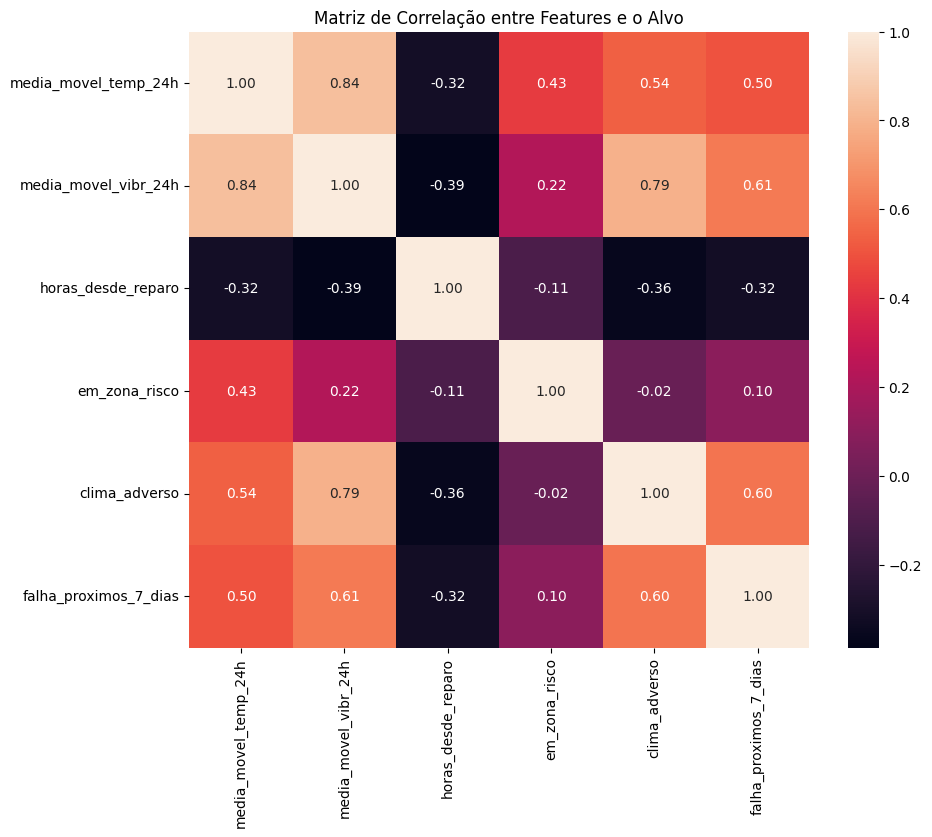

In [50]:
# 1. Selecionar apenas as colunas numéricas de interesse
colunas_para_correlacao = [
    'media_movel_temp_24h',
    'media_movel_vibr_24h',
    'horas_desde_reparo',
    'em_zona_risco',
    'clima_adverso',
    'falha_proximos_7_dias' # Nosso alvo
]
df_corr = df_modelagem[colunas_para_correlacao]

# 2. Calcular a matriz de correlação
matriz_correlacao = df_corr.corr()

# 3. Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacao,
    annot=True,      # Mostrar os números dentro dos quadrados
    fmt='.2f'        # Formatar os números com 2 casas decimais
)
plt.title('Matriz de Correlação entre Features e o Alvo')
plt.show()

# 5. Construção do Modelo Preditivo
### 5.1. Divisão dos Dados em Conjuntos de Treino e Teste
Antes de treinar o modelo, separamos nosso dataset em dois conjuntos:
- Dados de Treino (70%): Utilizados para ensinar o algoritmo a reconhecer os padrões que levam a uma falha.
- Dados de Teste (30%): Mantidos separados para avaliar a performance do modelo em dados que ele nunca viu antes, simulando uma situação real.
### 5.2. Treinamento do Modelo: Árvore de Decisão
Escolhemos o algoritmo de **Árvore de Decisão** para esta PoC devido à sua alta interpretabilidade. O modelo é treinado (`fit`) com os dados de treino, aprendendo as regras que melhor separam os casos de "Falha" dos de "Não Falha".

In [51]:
# 1. Preparar os dados
df_final_model = df_modelagem.dropna()
features = [
    'clima_adverso', 'em_zona_risco',
    'media_movel_temp_24h', 'media_movel_vibr_24h',
    'horas_desde_reparo'
]
X = df_final_model[features]
y = df_final_model['falha_proximos_7_dias']

# 2. Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Instanciar e treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(
    max_depth=3,              # Profundidade suficiente para capturar as novas regras
    class_weight='balanced',
    random_state=42
)
tree_model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso nos novos dados.")

Modelo de Árvore de Decisão treinado com sucesso nos novos dados.


### 5.3. Visualização da Árvore de Decisão e Suas Regras
A visualização da árvore nos permite entender exatamente como o modelo está tomando suas decisões. Cada "nó" da árvore representa uma pergunta sobre uma de nossas features (ex: "O clima é adverso?"), e os "ramos" mostram os caminhos que levam a uma previsão de falha ou não falha.

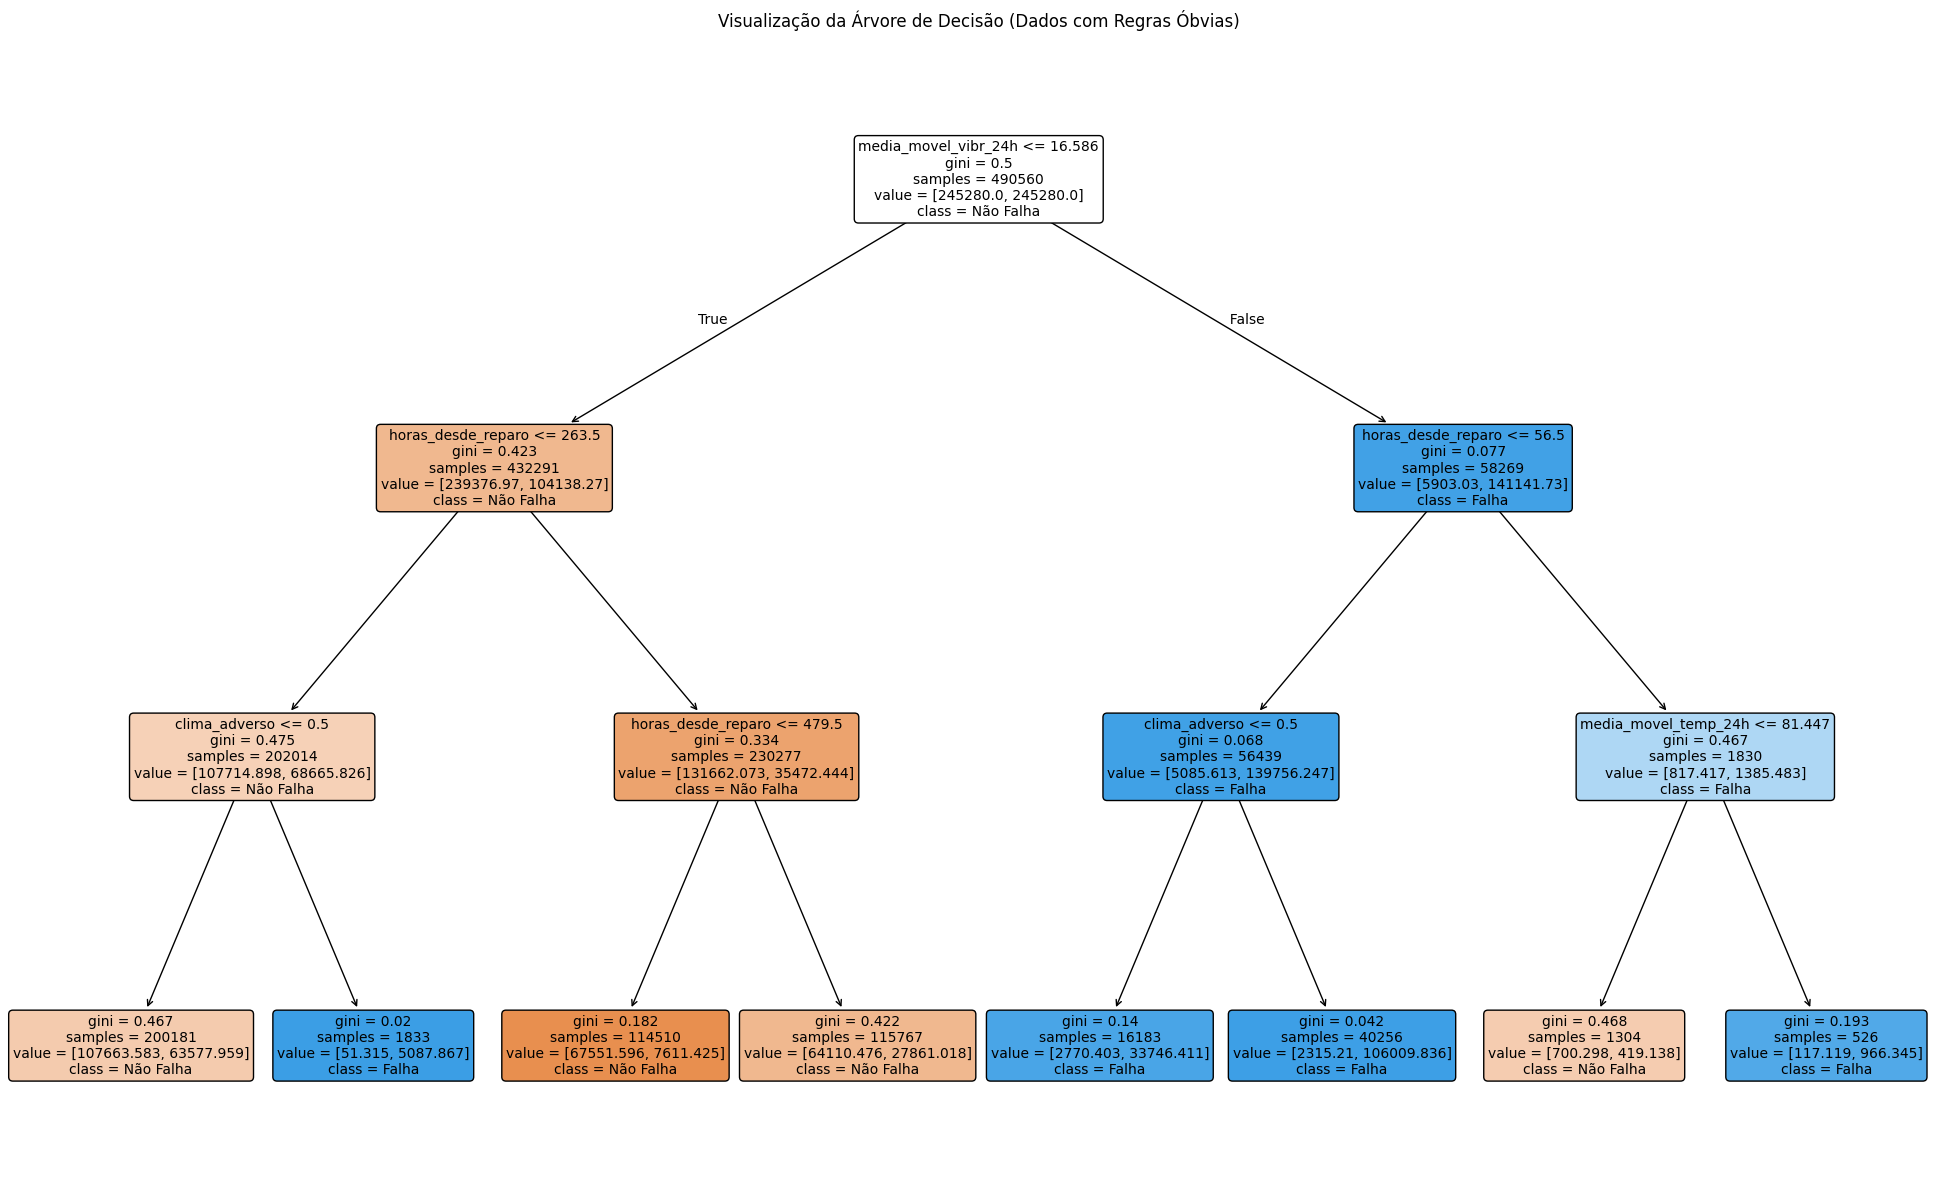

In [52]:
plt.figure(figsize=(25, 15))

plot_tree(
    tree_model,
    feature_names=features,
    class_names=['Não Falha', 'Falha'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Visualização da Árvore de Decisão (Dados com Regras Óbvias)")
plt.show()

# 6. Avaliação de Performance do Modelo

### 6.1. Análise dos Resultados nos Dados de Teste
Nesta etapa, utilizamos o conjunto de dados de teste para avaliar o quão bom o modelo realmente é. Medimos sua capacidade de generalização e sua eficácia em prever falhas em um cenário desconhecido.

### 6.2. Relatório de Classificação e Matriz de Confusão
Utilizamos métricas padrão para avaliar a performance:
- **Relatório de Classificação**: Fornece a **precisão** (quantos alertas de falha estavam corretos) e o **recall** (quantas das falhas reais o modelo conseguiu prever), que são cruciais para este problema.
- **Matriz de Confusão**: Mostra visualmente os acertos e erros do modelo, separando os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Relatório de Classificação (Árvore de Decisão):
              precision    recall  f1-score   support

   Não Falha       0.92      0.98      0.95    174125
       Falha       0.85      0.59      0.70     36115

    accuracy                           0.91    210240
   macro avg       0.89      0.78      0.82    210240
weighted avg       0.91      0.91      0.91    210240



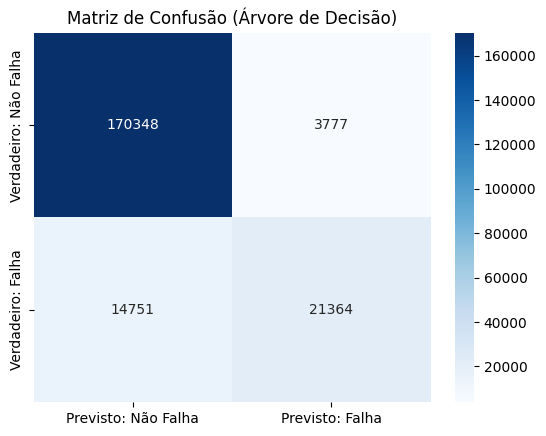

In [53]:
# 1. Fazer previsões no conjunto de teste com o modelo de árvore
y_pred = tree_model.predict(X_test)

# 2. Exibir o relatório de classificação e acurácia
print("Relatório de Classificação (Árvore de Decisão):")
print(classification_report(y_test, y_pred, target_names=['Não Falha', 'Falha']))

# 3. Plotar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Não Falha', 'Previsto: Falha'],
            yticklabels=['Verdadeiro: Não Falha', 'Verdadeiro: Falha'])
plt.title('Matriz de Confusão (Árvore de Decisão)')
plt.show()

# 7. Conclusão e Próximos Passos

### 7.1. Validação do Conceito com Dados Fictícios
Esta Prova de Conceito, utilizando um dataset sintético que simula as operações da Wilson Sons, **comprova que a metodologia de manutenção preditiva é tecnicamente viável e pode ser implementada com sucesso.** A análise demonstrou que é possível identificar padrões em dados operacionais e climáticos para antecipar falhas, como evidenciado pelo desempenho do modelo de Árvore de Decisão.

O objetivo deste trabalho não foi analisar os dados reais da empresa, mas sim **demonstrar a capacidade técnica e o raciocínio estratégico necessários para transformar dados brutos em inteligência acionável.**

### 7.2. Roteiro para Implementação com Dados Reais
O sucesso desta PoC indica um enorme potencial de otimização e economia para a Wilson Sons. Com um profissional qualificado e acesso aos dados reais da companhia, o próximo passo é aplicar esta metodologia para resolver o problema de negócio de forma definitiva. O roteiro para isso seria:

**1. Coleta e Integração de Dados Reais:**
   - Conectar-se às fontes de dados reais da Wilson Sons, como os sistemas de telemetria das embarcações, os logs de manutenção do sistema ERP (ex: SAP PM) e as bases de dados meteorológicos.

**2. Análise Exploratória e Tratamento Robusto:**
   - Realizar um trabalho aprofundado de análise nos dados reais para entender suas particularidades, tratar inconsistências e valores ausentes. Esta etapa é crucial, pois dados do mundo real sempre apresentam desafios de qualidade.

**3. Engenharia de Atributos com Foco no Negócio:**
   - Em colaboração com os engenheiros e operadores da Wilson Sons, desenvolver **features que capturem com precisão o estresse mecânico e as condições reais de desgaste**. Variáveis como o `ano_fabricacao` do rebocador, o histórico de componentes trocados e a intensidade das operações seriam integradas para criar um modelo muito mais rico e preciso.

**4. Treinamento e Validação do Modelo Definitivo:**
   - Treinar e validar diferentes algoritmos de Machine Learning (como Random Forest ou Gradient Boosting) nos dados reais, focando em otimizar as métricas de maior impacto para o negócio, como o **Recall** (capacidade de identificar o máximo de falhas possíveis) e a **Precisão** (minimizar alarmes falsos).

**5. Geração de Vantagens Estratégicas e Financeiras:**
   - O resultado final seria um modelo preditivo robusto, capaz de gerar alertas com alta confiabilidade. Isso se traduz diretamente em **vantagens monetárias** (redução de custos com reparos emergenciais e otimização de estoque) e **estratégicas** (aumento da disponibilidade e confiabilidade da frota), fortalecendo a posição da Wilson Sons como líder em eficiência e inovação no setor.